In [4]:
import cv2

In [5]:
# 画像をダウンロードする
import urllib.request as req
url = "https://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")

# OpenCVで読み込む
img = cv2.imread("test.png")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [6]:
img = cv2.imread("存在しないファイル.png")
print(img)

None


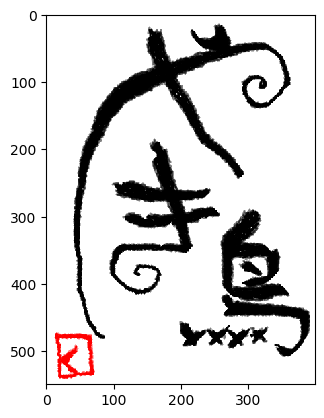

In [7]:
#ダウンロードした画像を表示する
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("test.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

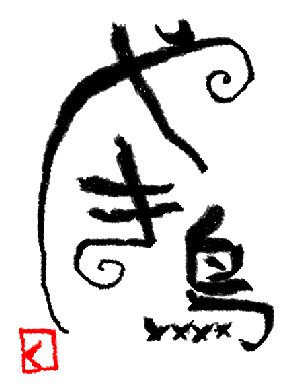

In [8]:
img = cv2.imread("test.png")
plt.axis("off") #axisを消す
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
#画像を保存する
import cv2
img = cv2.imread("test.png")
cv2.imwrite("out.png", img)

True

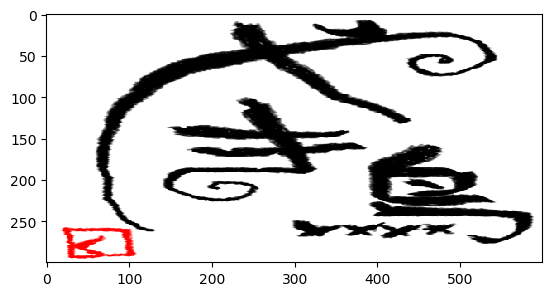

In [10]:
import matplotlib.pyplot as plt

# 画像を読み込み
img = cv2.imread("test.png")

# 画像をリサイズ
im2 = cv2.resize(img, (600, 300))

# リサイズした画像を保存
cv2.imwrite("out-resize.png", im2)

# 画像をリサイズして表示
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

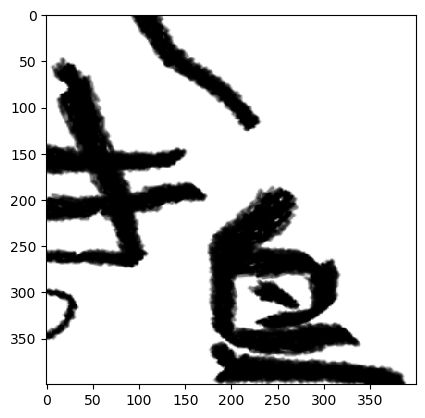

In [11]:
#画像を読み込み
img = cv2.imread("test.png")

# 画像の一部を切り取る
im2 = img[150:450, 150:450]

# 切り取った画像をリサイズ
im2 = cv2.resize(im2, (400, 400))

# 切り取った画像を保存
cv2.imwrite("cut-test.png", im2)

# 切り取った画像を表示
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

顔の座標 = 319 308 405 405


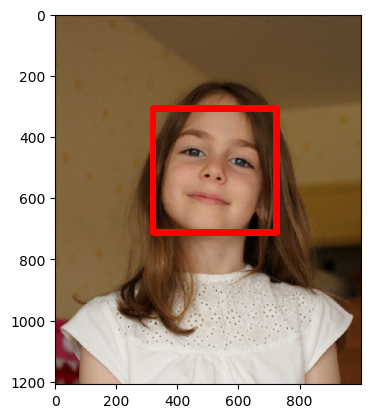

In [12]:
import matplotlib.pyplot as plt
import cv2

# カスケードファイルを指定して検出器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像を読み込んでグレイスケールに変換する
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

# 結果を確認
if len(face_list) == 0:
    print("失敗")
    quit()

# 認識した部分に印をつける
for (x, y, w, h) in face_list:
    print("顔の座標 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x + w, y + h), red, thickness=20)

# 画像を出力
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [1]:
import cv2

def mosaic(img,rect,size):

    #モザイクをかける領域を取得
    (x1,y1,x2,y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2,x1:x2]

    #一度縮小して拡大する
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)

    #画像処理にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2,x1:x2] = i_mos
    return img2


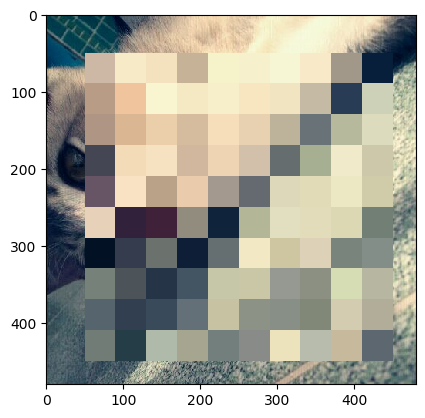

In [3]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

#画像を読み込んでモザイクをかける
img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)

#モザイクをかけた画像を出力
cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

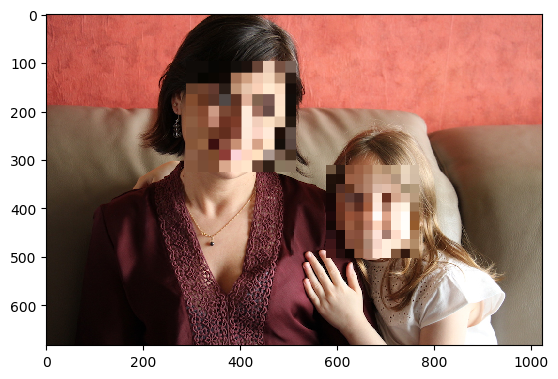

In [4]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

#カスケードファイルを指定して検出器を作成
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

#画像を読み込んでグレイスケールに変換する
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0: quit()

#認識した部分にモザイクをかける
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 10)

#画像を出力
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

---0---
顔の座標 =  319 308 405 405
---10---
顔の座標 =  394 385 409 409
---20---
顔の座標 =  451 444 408 408
---30---
顔の座標 =  494 483 409 409
---40---
---50---
---60---
---70---
---80---


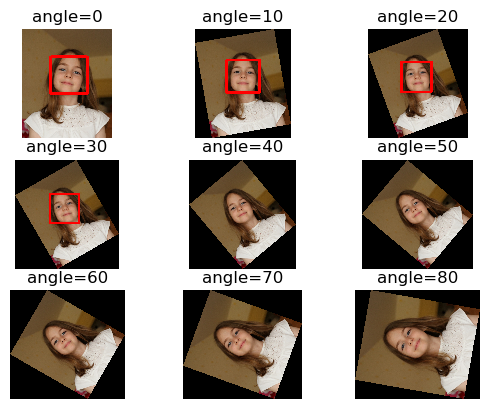

In [5]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

#検出器と画像の読み込み
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("girl.jpg")

#顔検出を実行し、印をつける
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300, 300))

    #認識した部分に印をつける
    for(x,y,w,h) in face_list:
        print("顔の座標 = ",x,y,w,h)
        red = (0,0,255)
        cv2.rectangle(img, (x,y), (x+w, y+h),red,thickness=30)

#角度ごとに検証する
for i in range(0,9):
    ang = i*10
    print("---"+str(ang)+"---")
    img_r = ndimage.rotate(img,ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.title("angle=" +str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()